<a href="https://colab.research.google.com/github/rafaeldjsm/Matematica/blob/main/vies_linear_reg_exponencial/best_adjust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

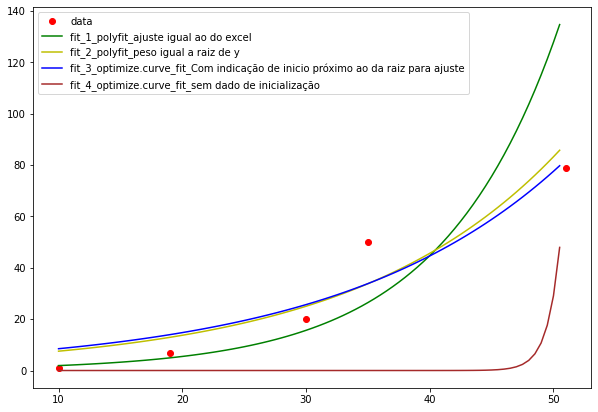

In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.optimize as optimize
from matplotlib import pyplot as plt


# Teste em ajuste do tipo ln(y) = a + b*x
y = np.array([1, 7, 20, 50, 79])
x = np.array([10, 19, 30, 35, 51])
x_fit = np.arange(start=10, stop=51, step=0.5)

plt.figure(figsize=(10,7))
plt.plot(x, y, "ro", label = "data")

#Este seria um forma de conseguir o ajuste exponencial
# usando o logatimo,assim como fazemos no excel
# Regressão linear np.polyfit(x, y, 1) retorna os coeficientes da regressão

aj1 = np.polyfit(x, np.log(y), 1)                          
yaj1 = np.exp(aj1[1])*np.exp(aj1[0]*x_fit)
plt.plot(x_fit, yaj1, "green", label = "fit_1_polyfit_ajuste igual ao do excel")

# Este com ajuste do peso por raiz de y, menos enviesado
aj2 = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
yaj2 = np.exp(aj2[1])*np.exp(aj2[0]*x_fit)
#ajuste igual ao excel com peso igual a raiz
plt.plot(x_fit, yaj2, "y", label = "fit_2_polyfit_peso igual a raiz de y ")

# Memso resultado que o primeiro método curve_fit(func, x, y)
aj3 = scipy.optimize.curve_fit(lambda t,a,b: a+b*np.log(t),  y,  x)

def ff(t, a, b):
    return a*np.exp(b*t)

# pfit são os parâmetros que ajustam a curva
pfit, perr = scipy.optimize.curve_fit(ff, x, y, p0=(4, 0.1))


#ajuste com peso
y_fit = ff(x_fit, *pfit)
plt.plot(x_fit, y_fit, "b", label = "fit_3_optimize.curve_fit_Com indicação de inicio próximo ao da raiz para ajuste")

#Muito errado
aj5 = scipy.optimize.curve_fit(ff,  x,  y) #erro se desconsiderar dado de inicialização
y_fit2 = ff(x_fit, *aj5[0])
plt.plot(x_fit, y_fit2, "brown", label = "fit_4_optimize.curve_fit_sem dado de inicialização")


plt.legend()
plt.show()